# Orderbook imbalance heatmap chart

In [1]:
import numpy as np
from simple.plotly import chartFigure
from simple.funcs import symlog, Ratio, tickSpeed
from simple.pretty import pmap
from functools import partial
import matplotlib.pyplot as plt

In [2]:
%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.dpi'] = 80
plt.rcParams['figure.subplot.left'] = 0.04
plt.rcParams['figure.subplot.right'] = 0.96
plt.rcParams['figure.subplot.top'] = 0.96
plt.rcParams['figure.subplot.bottom'] = 0.04
plt.rcParams['axes.grid'] = False
plt.rcParams['image.aspect'] = 'auto'

In [3]:
S = np.load('data/ETHUSDT.2022-05-08.snap.npz')['ETHUSDT'].view(np.recarray)
A, vA, B, vB = S.A.T, S.vA.T, S.B.T, S.vB.T

In [4]:
# indexed chart with bidask
fig = chartFigure(rows=2,
    Bid=dict(y=A[0], color='green'),
    Ask=dict(y=B[0], color='red'),
    Imb=dict(y=Ratio(vA, vB, 100), color='blue', row=2)
)
fig

FigureWidgetResampler({
    'data': [{'line': {'color': 'green'},
              'name': '<b style="color:sandy…

In [5]:
Imb = pmap(lambda level: Ratio(vA, vB, level), range(1, A.shape[0]))

  0%|          | 0/199 [00:00<?, ?it/s]

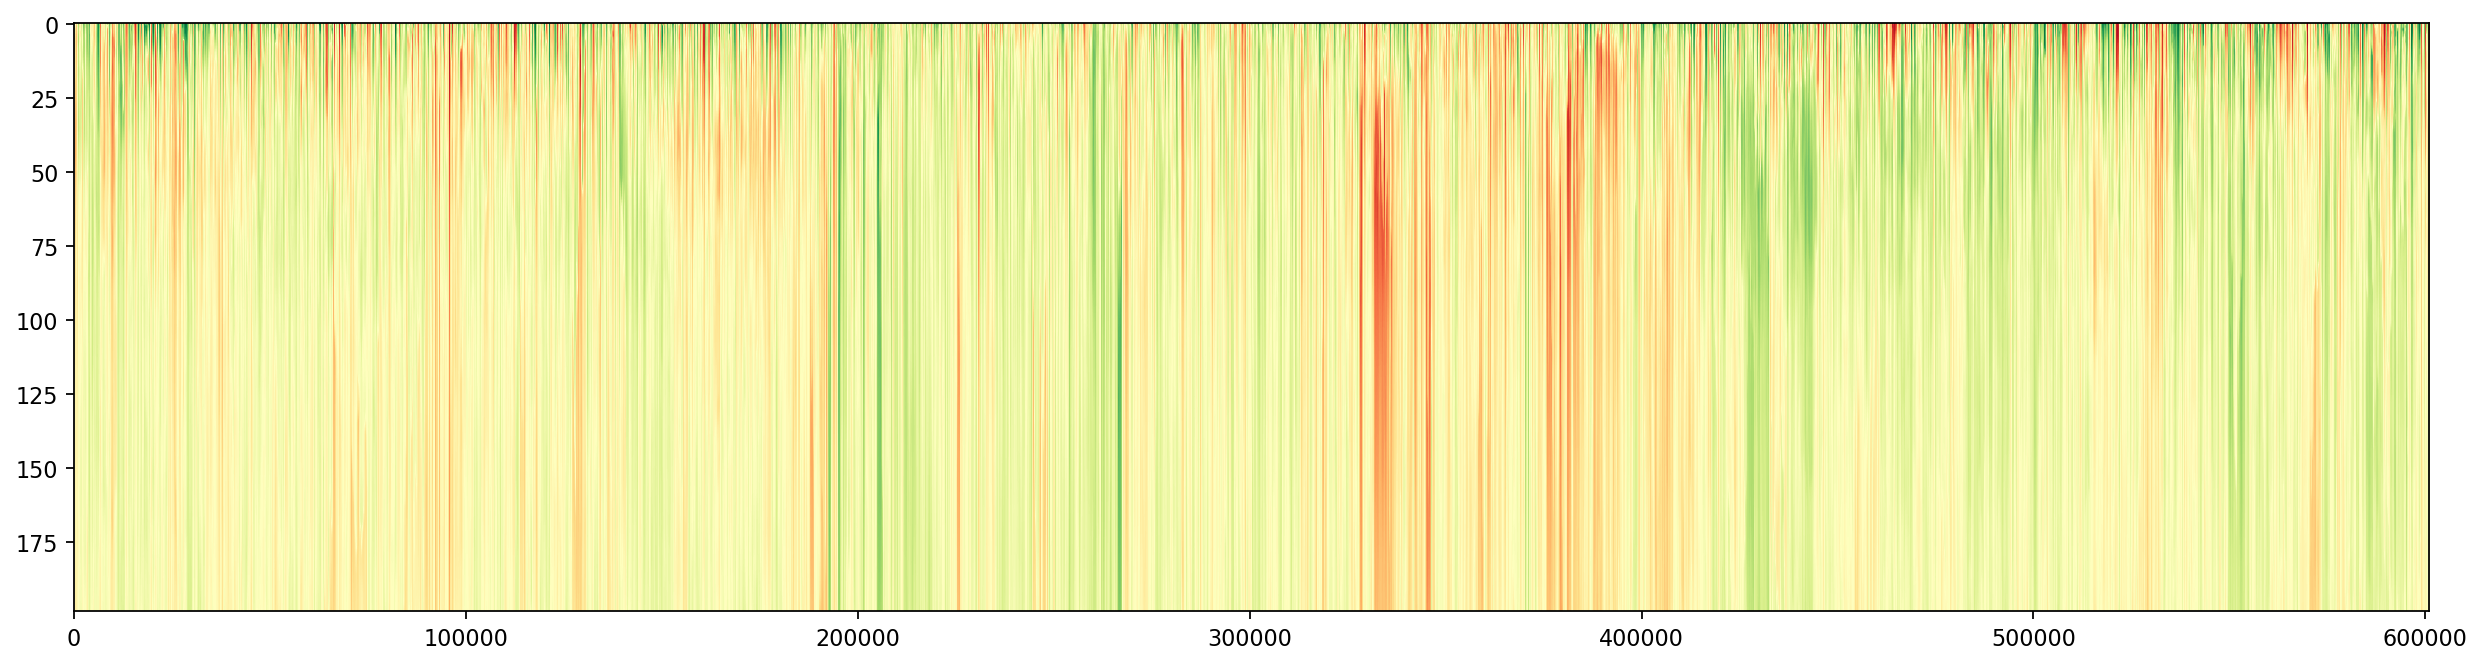

In [6]:
plt.figure(figsize=(16,4))
plt.imshow(Imb, cmap='RdYlGn');